# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


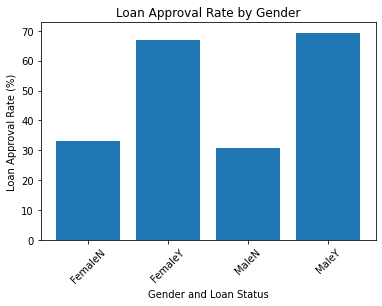

In [3]:
gender_loan_status = df[['Gender', 'Loan_Status']]

gender_loan_status_count = gender_loan_status.groupby(['Gender', 'Loan_Status'])['Loan_Status'].count().reset_index(name="Count")

gender_loan_status_count['Percentage'] = gender_loan_status_count.groupby('Gender')['Count'].apply(lambda x: x/x.sum() * 100)

plt.bar(gender_loan_status_count['Gender'] + gender_loan_status_count['Loan_Status'], gender_loan_status_count['Percentage'])
plt.title('Loan Approval Rate by Gender')
plt.xlabel('Gender and Loan Status')
plt.ylabel('Loan Approval Rate (%)')
plt.xticks(rotation=45)
plt.show()


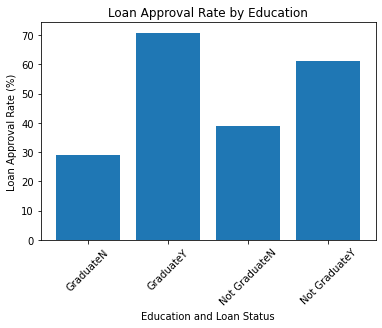

In [4]:
edu_loan_status = df[['Education', 'Loan_Status']]

edu_loan_status_count = edu_loan_status.groupby(['Education', 'Loan_Status'])['Loan_Status'].count().reset_index(name="Count")

edu_loan_status_count['Percentage'] = edu_loan_status_count.groupby('Education')['Count'].apply(lambda x: x/x.sum() * 100)

plt.bar(edu_loan_status_count['Education'] + edu_loan_status_count['Loan_Status'], edu_loan_status_count['Percentage'])
plt.title('Loan Approval Rate by Education')
plt.xlabel('Education and Loan Status')
plt.ylabel('Loan Approval Rate (%)')
plt.xticks(rotation=45)
plt.show()

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [8]:
df.sort_values(by = 'ApplicantIncome', ascending = False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
468,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [9]:
df['Credit_History'].sum()

475.0

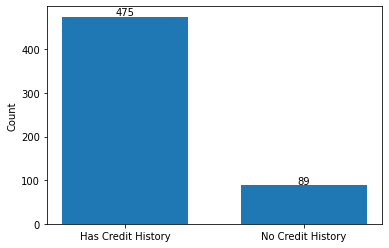

In [10]:
import matplotlib.pyplot as plt

credit_counts = df['Credit_History'].value_counts()

plt.bar(['Has Credit History', 'No Credit History'], credit_counts.values, width = 0.7)

for i, count in enumerate(credit_counts.values):
    plt.text(i, count+3, str(count), ha='center')

plt.ylabel('Count')

plt.show()

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

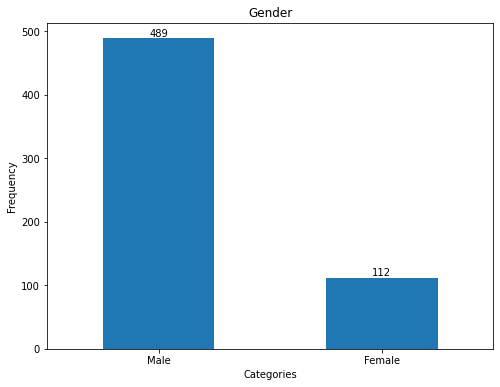

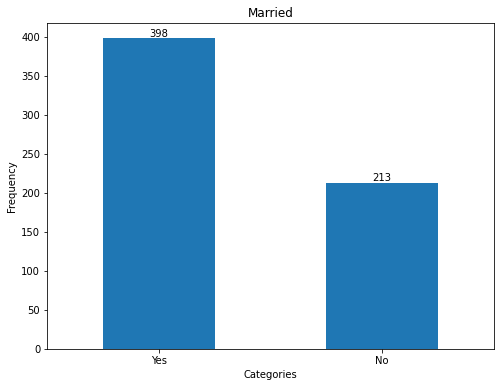

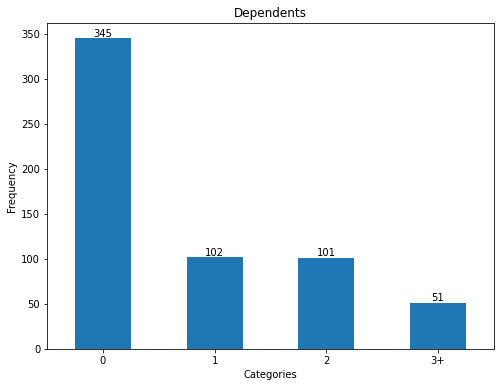

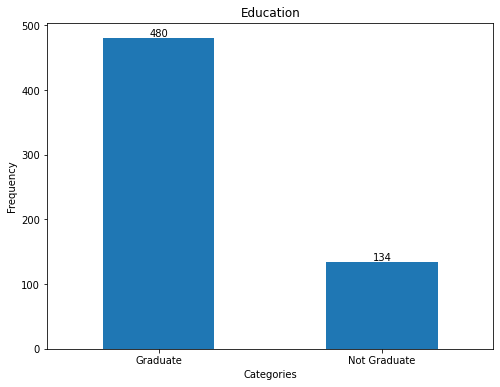

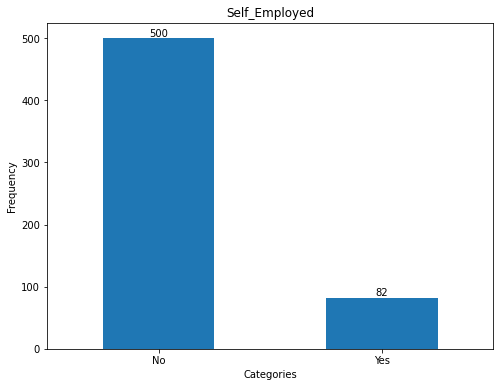

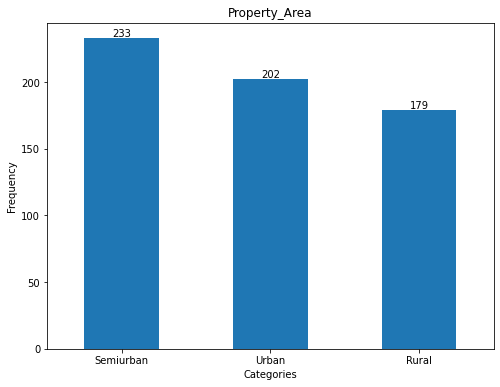

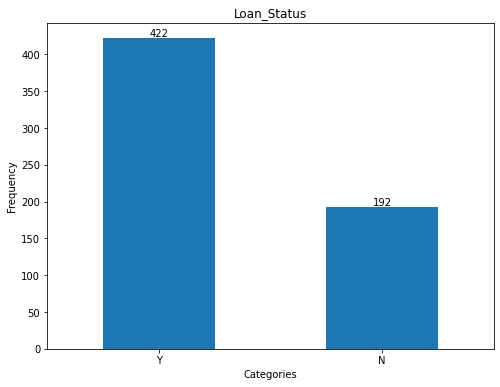

In [11]:
df_nominal = df.drop('Loan_ID', axis = 1)

for col in df_nominal.columns:
    if df_nominal[col].dtype == 'object':  
        plt.figure(figsize=(8, 6))    
        plt.title(col) 
        plt.xlabel('Categories') 
        plt.ylabel('Frequency') 
        counts = df_nominal[col].value_counts()
        counts.plot(kind='bar')
        for i, count in enumerate(counts): 
            plt.text(i, count, str(count), ha='center', va='bottom')
        plt.xticks(rotation=0) 
        plt.show()
      

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



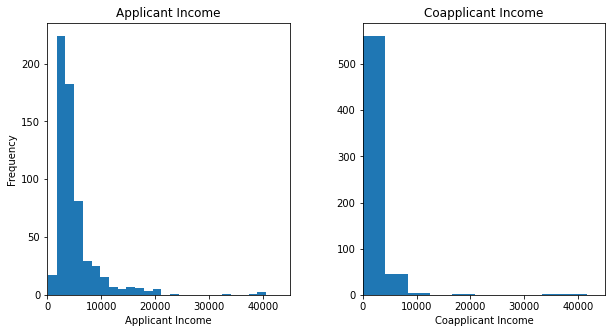

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df['ApplicantIncome'], bins=50)
axs[1].hist(df['CoapplicantIncome'], bins=10)

axs[0].set_title('Applicant Income')
axs[1].set_title('Coapplicant Income')
axs[0].set_xlabel('Applicant Income')
axs[1].set_xlabel('Coapplicant Income')
axs[0].set_ylabel('Frequency')
axs[0].set_xlim(0,45000)
axs[1].set_xlim(0,45000)
plt.subplots_adjust(wspace = 0.3)
plt.show()

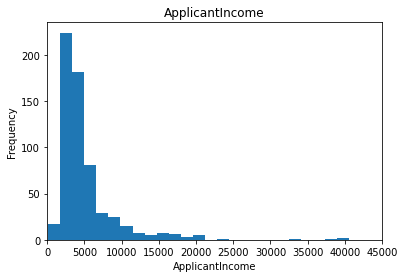

In [13]:
plt.hist(df['ApplicantIncome'], bins=50)
plt.title('ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.xlim(0, 45000)

plt.show()

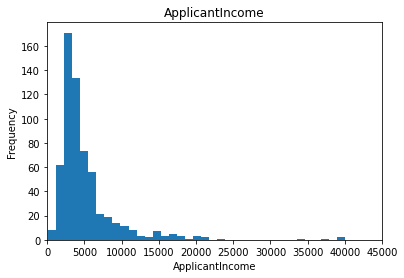

In [14]:
plt.hist(df['ApplicantIncome'], bins=75)
plt.title('ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.xlim(0, 45000)

plt.show()


Look at box plots to understand the distributions. 

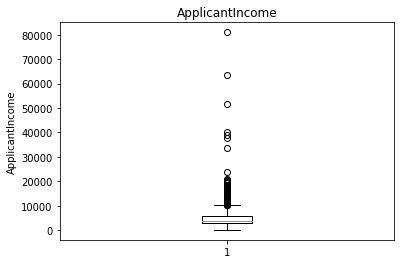

In [15]:
plt.boxplot(df['ApplicantIncome'])
plt.title('ApplicantIncome')
plt.ylabel('ApplicantIncome')

plt.show()


Look at the distribution of income segregated  by `Education`

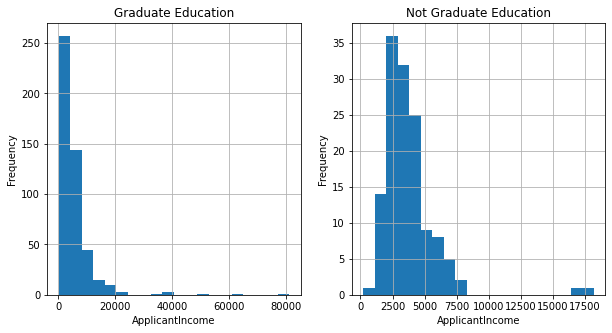

In [16]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


df[df['Education'] == 'Graduate']['ApplicantIncome'].hist(ax=axs[0], bins=20)
axs[0].set_title('Graduate Education')
axs[0].set_xlabel('ApplicantIncome')
axs[0].set_ylabel('Frequency')

df[df['Education'] == 'Not Graduate']['ApplicantIncome'].hist(ax=axs[1], bins=20)
axs[1].set_title('Not Graduate Education')
axs[1].set_xlabel('ApplicantIncome')
axs[1].set_ylabel('Frequency')

plt.show()


Look at the histogram and boxplot of LoanAmount

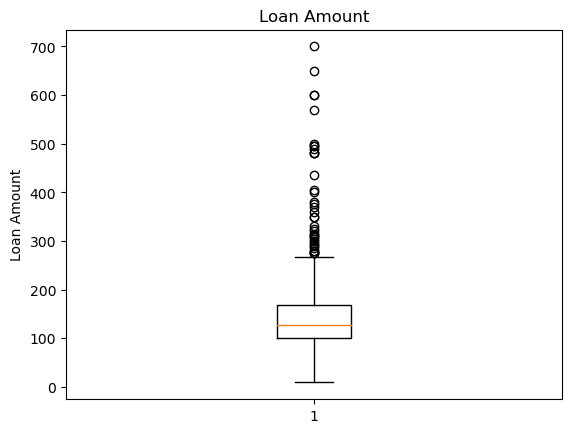

In [16]:
df_loan = df.dropna(subset=['LoanAmount'])
plt.boxplot(df_loan['LoanAmount'])
plt.title('Loan Amount')
plt.ylabel('Loan Amount')
plt.show()

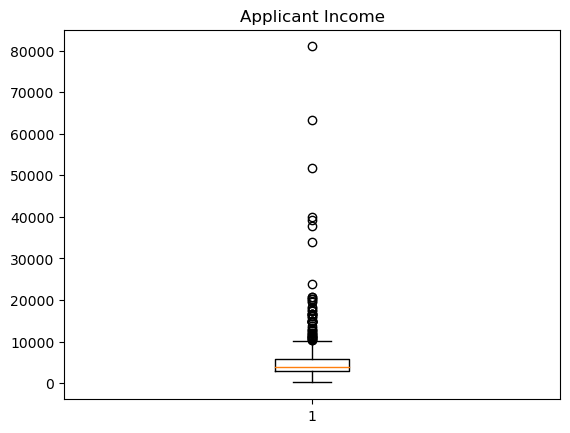

In [17]:
plt.boxplot(df['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [18]:
gender_approval_rate = df.pivot_table(values='Loan_Status', index=['Gender'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
gender_approval_rate

education_gender_approval_rate = df.pivot_table(values='Loan_Status', index=['Education', 'Gender'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
education_gender_approval_rate


Loan_Status
Education    Gender             
Graduate     Female     0.663043
             Male       0.720745
Not Graduate Female     0.700000
             Male       0.601770

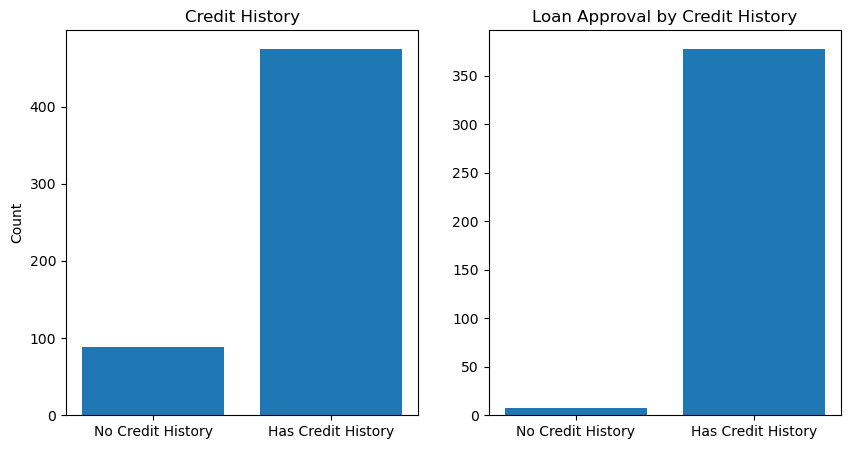

In [19]:
credit_hist_counts = df['Credit_History'].value_counts()
credit_hist_approvals = df.pivot_table(index='Credit_History', values='Loan_Status', aggfunc=lambda x: sum(x=='Y'))

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].bar(credit_hist_counts.index, credit_hist_counts.values)
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['No Credit History', 'Has Credit History'])
ax[0].set_ylabel('Count')
ax[0].set_title('Credit History')

ax[1].bar(credit_hist_approvals.index, credit_hist_approvals.values.ravel())
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['No Credit History', 'Has Credit History'])
ax[1].set_title('Loan Approval by Credit History')
plt.show()


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [17]:
df['Loan_Amount_Term'].isnull().sum()

14

In [18]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [19]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [20]:
df['Loan_Amount_Term'].describe()

count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [21]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().values[0])
df['Married'] = df['Married'].fillna(df['Married'].mode().values[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().values[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().values[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().values[0])

In [23]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [25]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

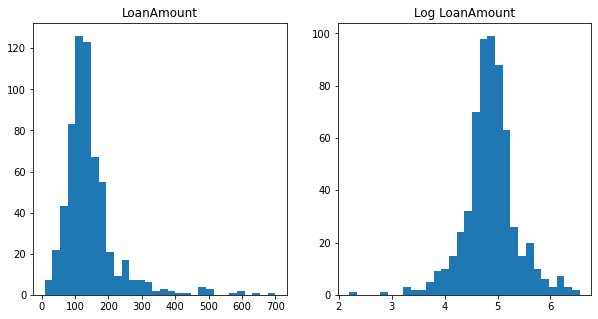

In [27]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(df["LoanAmount"], bins=30)
axes[0].set_title("LoanAmount")

axes[1].hist(df["LoanAmount_log"], bins=30)
axes[1].set_title("Log LoanAmount")

plt.show()


Combine both incomes as total income and take a log transformation of the same.

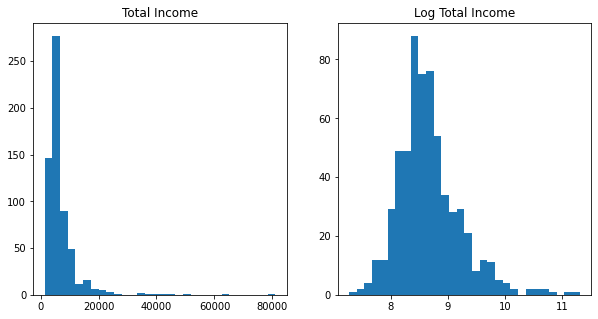

In [28]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(df['TotalIncome'], bins=30)
axes[0].set_title("Total Income")

axes[1].hist(df["TotalIncome_log"], bins=30)
axes[1].set_title("Log Total Income")

plt.show()

In [29]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


## 4. Building a Predictive Model

In [30]:
df = pd.get_dummies(df, columns=['Gender', 'Married','Dependents', 'Education', 'Self_Employed','Property_Area'])
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,Y,4.986426,5849.0,8.674026,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,N,4.852030,6091.0,8.714568,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,Y,4.189655,3000.0,8.006368,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,Y,4.787492,4941.0,8.505323,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,Y,4.948760,6000.0,8.699515,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.000000,360.0,1.0,Y,4.262680,2900.0,7.972466,...,0,0,0,1,0,1,0,1,0,0
610,LP002979,4106,0.0,40.000000,180.0,1.0,Y,3.688879,4106.0,8.320205,...,0,0,1,1,0,1,0,1,0,0
611,LP002983,8072,240.0,253.000000,360.0,1.0,Y,5.533389,8312.0,9.025456,...,1,0,0,1,0,1,0,0,0,1
612,LP002984,7583,0.0,187.000000,360.0,1.0,Y,5.231109,7583.0,8.933664,...,0,1,0,1,0,1,0,0,0,1


In [31]:
df['Loan_Status'] = np.where(df['Loan_Status'] == 'Y', 1, 0)

In [32]:
df.dtypes

Loan_ID                     object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
LoanAmount_log             float64
TotalIncome                float64
TotalIncome_log            float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop(['Loan_ID', 'Loan_Status'], axis = 1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Accuracy score: 0.8


Try paramater grid search to improve the results

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4],
              'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8}
Best accuracy score:  0.8227906976744187


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [33]:
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np

In [2]:
df_pipeline = pd.read_csv("data.csv") 
df_pipeline.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_pipeline.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df_pipeline = df_pipeline.drop('Loan_ID', axis = 1)

In [5]:
df_pipeline

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
num = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), ('scaling', StandardScaler())])
cat = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(sparse=False))])
amt = Pipeline([("impute_mean", SimpleImputer(strategy='mean')),("log", PowerTransformer())])

In [7]:
pre_process = ColumnTransformer([('numeric',num,['Loan_Amount_Term']),
                                     ('categorical',cat,['Gender','Married','Credit_History','Dependents','Education','Self_Employed','Property_Area']),
                                     ('amount', amt,['ApplicantIncome','CoapplicantIncome','LoanAmount'] )])

In [8]:
mod = RandomForestClassifier(random_state=42)

In [9]:
pipe = Pipeline(steps = [('preprocessing', pre_process), ('scaling', StandardScaler()), ('classifier', mod)])

In [10]:
X = df_pipeline
y = df_pipeline['Loan_Status']

In [17]:
X = X.drop(['Loan_Status'], axis=1)
X.shape

(614, 11)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 20) 

In [19]:
print(y_test)

591    N
613    N
500    Y
242    Y
387    N
      ..
263    Y
63     N
148    N
342    Y
545    Y
Name: Loan_Status, Length: 123, dtype: object


In [20]:
from sklearn import set_config
pipe.fit(X_train, y_train)
steps = [('preprocessing', pre_process), ('scaling', StandardScaler()), ('classifier', mod)]
pipesteps = Pipeline(steps)
set_config(display="diagram")
pipesteps

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Credit_History',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('amount',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('log',
                                                                   PowerTransformer())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount'])])),
                ('scaling', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [21]:
y_pred = pipe.predict(X_test)

In [22]:
score = pipe.score(X_test, y_test)
print(f'Test score: {score:.2f}') 

Test score: 0.72


In [23]:
param_grid = {
              'classifier__max_depth': [3, 5, 7],
              'classifier__min_samples_split': [2, 4, 6, 8],
              'classifier__min_samples_leaf': [1, 2, 3, 4],
              'classifier__criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4}
Best accuracy score:  0.828963100391672


In [24]:
import pickle

with open('model_predict.pkl', 'wb') as file:
    pickle.dump(pipe, file)

In [25]:
import pickle
with open("model_predict.pkl", "rb") as f:
    model = pickle.load(f)

In [26]:
model
z = model.predict(X_test)


In [27]:
z

array(['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [34]:
import requests
import json

base_url = 'http://127.0.0.1:5000/scoring'

json_data = {
    "Gender": 'Male',
    "Married": 'Yes',
    "Dependents": '0',
    "Education": 'Graduate',
    "Self_Employed": 'No',
    "ApplicantIncome": 100000,
    "CoapplicantIncome": 0,
    "LoanAmount": 20,
    "Loan_Amount_Term": 120,
    "Credit_History": 1,
    "Property_Area": 'Rural',
}

response = requests.post(url=base_url, json=json_data)

if response.status_code == 200:
    print('...')
    print('request successful')
    print('...')
    print(response.json())
    print(np.argmax(response.json()))
else:
    print(response.json())
    print('request failed')


...
request successful
...
[[0.3, 0.7]]
1
